# Analyse Exploratoire des Ventes d'une Chaine de vente d'electroniques 

Nous avons dans le dossier Sales_Data des données de ventes d'une entreprise sur l'année 2019. Vous avez un fichier csv par mois.

Chaque fichier contient les colonnes suivantes:
* OrderID: l'identifiant unique de la commande
* Product: La désignation du produit
* Quantity Ordered: la quantité vendue
* Price each: le prix unitaire
* order date : La date d'achat
* Purchase adress: l'adresse de la boutique de vente

Nous allons analyser ces données pour répondre aux questions suivantes:

* Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
* Dans quelle ville a-t-on le plus vendu de produits ?
* A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
* Quels sont les produits qui sont souvent achetés ensemble ?
* Quel produit a-t-on le plus vendu et pourquoi ?

Nous allons accompagner nos solutions de visualisations pertinentes afin d'aider le business à améliorer ses chiffres de l'année suivante.



In [97]:
import pandas as pd
import os

dir_path = 'Sales_Data'

file_list = [file for file in os.listdir(dir_path)]

total_file = []

for file in file_list:
    file_path = os.path.join(dir_path, file)
    df_temp = pd.read_csv(file_path)
    total_file.append(df_temp)

df = pd.concat(total_file, ignore_index=True)

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


on remarque que la seconde ligne de la bdd ne contient que des valeurs nulles, on va verifier si ce cas se repete, ou si il y a des entrees avec un ou plus, mais pas uniquement des valeurs nulles.

In [98]:
empty_line_df = df[df.isnull().any(axis=1)]
partial_empty_line_df = df[df.isnull().any(axis=1) & ~df.isnull().all(axis=1)]


empty_line_df.size , partial_empty_line_df.size


(3270, 0)

il y a donc bien un certain nombre de lignes avec des valeurs nulles, mais pas uniquement des valeurs nulles.

Nous pouvons dumper les valeurs nulles dans un fichier csv, et les valeurs non nulles dans un autre fichier csv.

In [99]:
df = df.dropna()

le reste de la bdd ne semble pas necessiter d'autres modifications, aucune colonne n'a de type mixte.

In [100]:
df._is_mixed_type

False

Nous allons tout de meme transformer les valeurs de Order Date en type Datetime, pour faciliter nos operations par la suite

In [108]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df = df.dropna(subset=['Order Date'])

Nous allons determiner le mois le plus lucratif

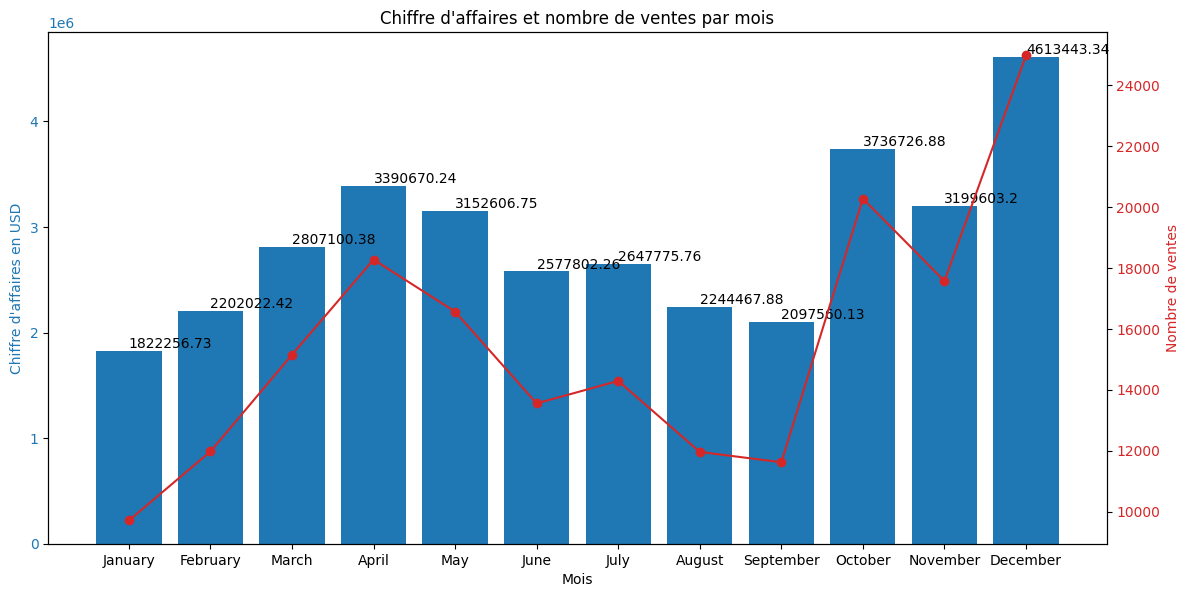

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

df['Month'] = df['Order Date'].dt.month

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

monthly_sales = df.groupby('Month').sum()['Sales']

monthly_orders = df.groupby('Month').size()

best_month = monthly_sales.idxmax()

best_month_sales = monthly_sales.max()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Mois')
ax1.set_ylabel('Chiffre d\'affaires en USD', color=color)
bars = ax1.bar(monthly_sales.index, monthly_sales.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(monthly_sales.index)
ax1.set_xticklabels([calendar.month_name[i] for i in monthly_sales.index])

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Nombre de ventes', color=color)
ax2.plot(monthly_sales.index, monthly_orders.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title("""Chiffre d'affaires et nombre de ventes par mois""")
plt.show()


Le mois de decembre est le plus lucratif, et represente le plus gros chiffre d'affaires de l'annee 2019, ainsi plus de ventes.

Cela vient evidemment coincider avec la periode des fetes de fin d'annee.

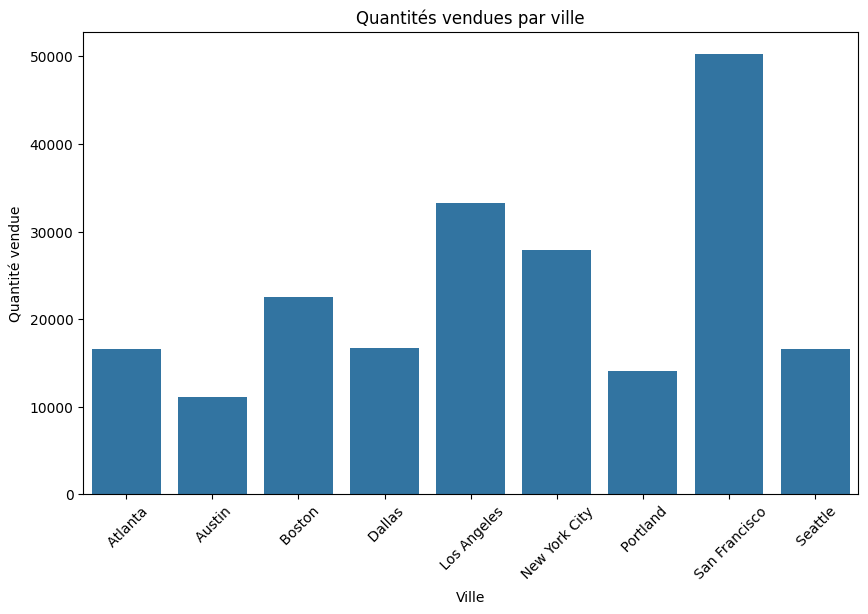

In [103]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

city_quantity = df.groupby('City').sum()['Quantity Ordered']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
quantity_plot = sns.barplot(x=city_quantity.index, y=city_quantity.values)
quantity_plot.set_title('Quantités vendues par ville')
quantity_plot.set_xlabel('Ville')
quantity_plot.set_ylabel('Quantité vendue')
plt.xticks(rotation=45)
plt.show()

La ville ou le plus des ventes sont faites est San Fransisco, Los Angeles et New York suivent de loin.

Cela peut s'expliquer par le nombre d'habitants dans ces villes, neanmoins San Fransisco est fortement moins peueple que Los Angeles ou New York, on peut donc conclure qu'il y a un vrai levier dans cette ville, ou les boutiques de cette ville.

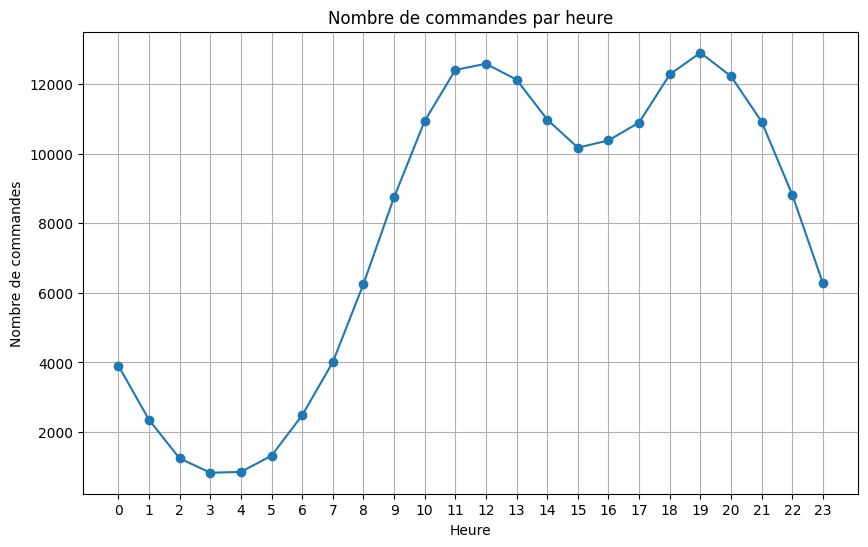

In [104]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df = df.dropna(subset=['Order Date'])

df['Hour'] = df['Order Date'].dt.hour

orders_per_hour = df.groupby('Hour').count()['Order ID']

plt.figure(figsize=(10, 6))
plt.plot(orders_per_hour.index, orders_per_hour.values, marker='o')
plt.title('Nombre de commandes par heure')
plt.xlabel('Heure')
plt.ylabel('Nombre de commandes')
plt.xticks(orders_per_hour.index)
plt.grid(True)
plt.show()

On a ici les commandes regroupees par l'heure a laquelle ils ont ete achetes. 

Attention, il s'agit bien de l'heure d'achat, et la correlation avec le visionnage d'une pub n'est pas garantie, rien ne garanti que les achats effectues a 17h decoulent d'un acheteur ayant vu une pub a 15 ou 16h.
Cependant on remarque que les heures des ventes les plus importantes sont 12 et 19h, l'horaire du repas en general, ou les consommateurs utilisent les medias et voient des publicites. On peut donc conclure qu'il y a une correlation.

Pour augmenter les ventes, on peut adopter deux strategies:
    augmenter les pubs aux horaires les plus importants, comme 12h et 19h
    augenter les pubs aux horaires les moins importants, comme le matin a 7h, pour cibler un autre type de clientele

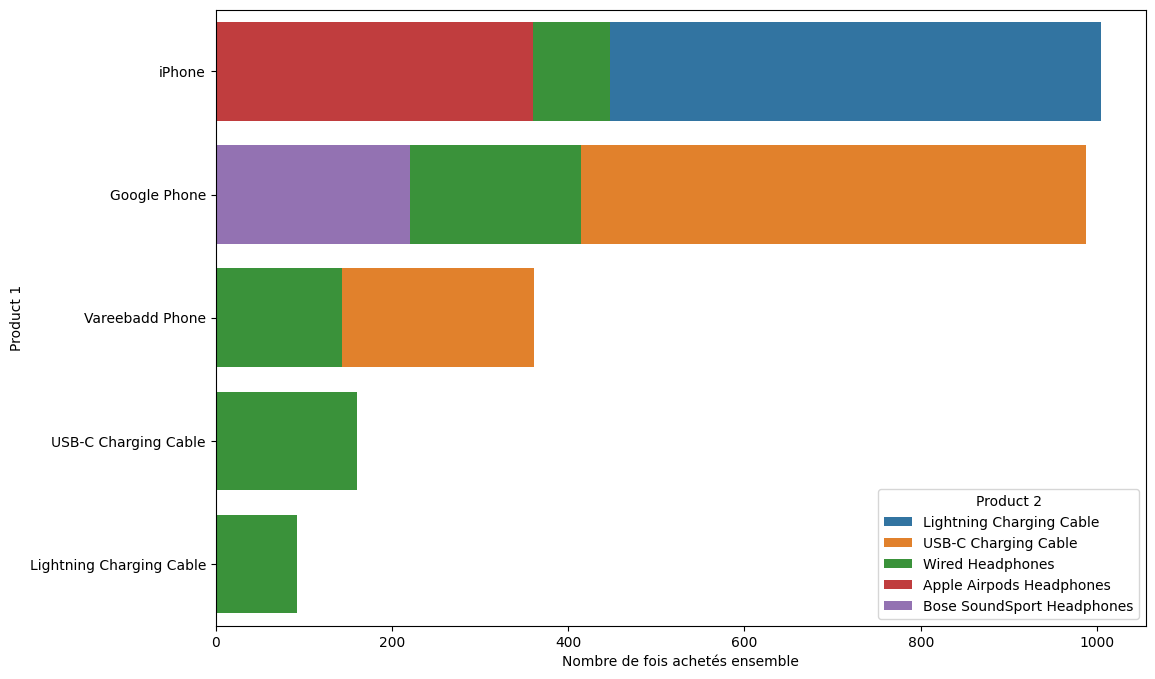

In [107]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_grouped = df[['Order ID', 'Grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter

count = Counter()

for row in df_grouped['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

pair_count = pd.DataFrame(count.most_common(10), columns=['Pair', 'Count'])

pair_count['Product 1'] = pair_count['Pair'].apply(lambda x: x[0])
pair_count['Product 2'] = pair_count['Pair'].apply(lambda x: x[1])
pair_count.drop('Pair', axis=1, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Product 1', hue='Product 2', data=pair_count, dodge=False)
plt.xlabel('Nombre de fois achetés ensemble')
plt.show()

Ici, on Remarque que les deux paires de produits les plus recurrentes sont un telephone couple a un cable de recharge. Cela peut s'expliquer par le fait que les consommateurs anticipent qu'ils auront besoin de deux cables pour recharger l'appareil qu'ils viennent d'acheter, ou encore ils cherchent a acquerir un cable plus efficace que celui donne de base avec l'appareil (Lightning Charging Cable est surment un cable de recharge express)

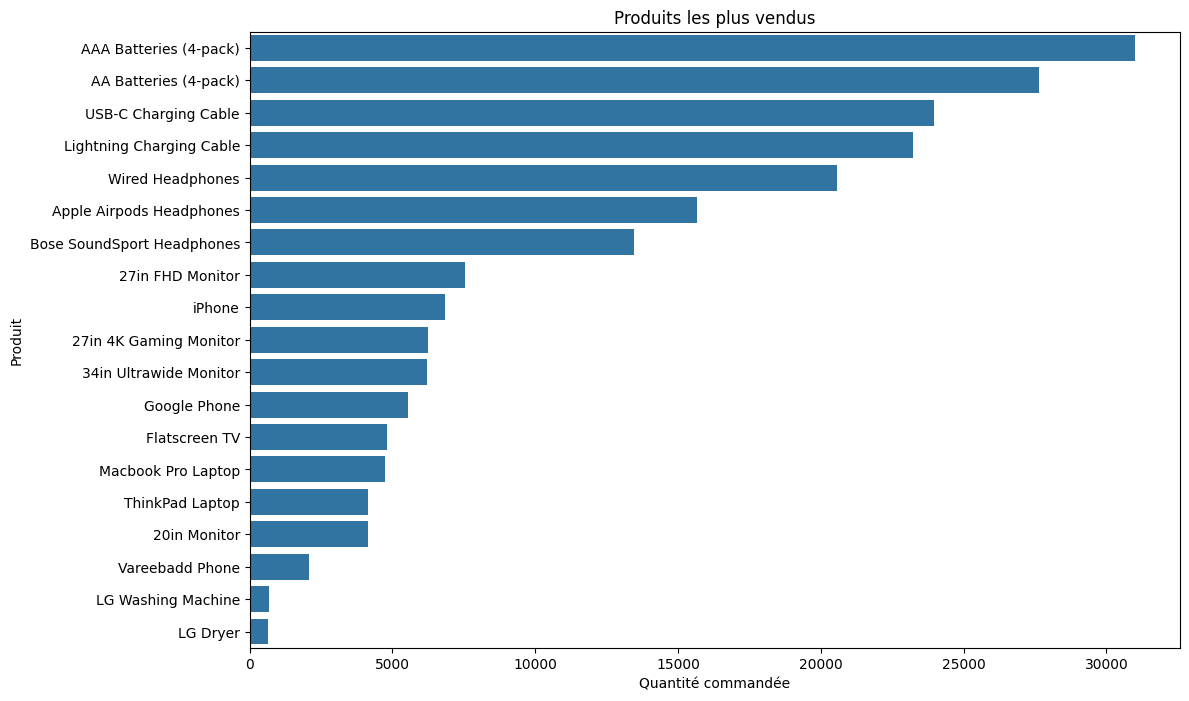

In [106]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
best_seller = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

best_seller = best_seller.sort_values(by='Quantity Ordered', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity Ordered', y='Product', data=best_seller)
plt.title('Produits les plus vendus')
plt.xlabel('Quantité commandée')
plt.ylabel('Produit')
plt.show()


Le Best Seller sont les piles jetables, AAA Battery, on notera egalement que le second produit le plus vendu sont egalement des piles.

Cela s'explique par le fait qu'il s'qgisse de biens de consommations limites, une fois vide les consommateurs doivent racheter les piles.